# Laboratorio 3
## Inteligencia Artificial
## Seccion 
### Andres de la Roca 20332

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

# Para explorar la data
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

### Task 1/1.1
Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un np.array para ser trabajado en el notebook.


In [15]:
'''
Se lee el archivo que contiene el dataset y se guarda dentro de un
dataframe asignado a la variable data
'''
data = pd.read_csv('kc_house_data.csv')

In [16]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [17]:
data_array = data.values # Se almacenan los valores dentro de un numpy array

data_array

array([[7129300520, '20141013T000000', 221900.0, ..., -122.257, 1340,
        5650],
       [6414100192, '20141209T000000', 538000.0, ..., -122.319, 1690,
        7639],
       [5631500400, '20150225T000000', 180000.0, ..., -122.233, 2720,
        8062],
       ...,
       [1523300141, '20140623T000000', 402101.0, ..., -122.299, 1020,
        2007],
       [291310100, '20150116T000000', 400000.0, ..., -122.069, 1410,
        1287],
       [1523300157, '20141015T000000', 325000.0, ..., -122.299, 1020,
        1357]], dtype=object)

### Task 1.2
Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona
las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
# Se toma el valor deseado de todos los arrays anidados de data_array
price = data_array[:, 2]
sqft_living = data_array[:, 5]

print(price)
print(sqft_living)

[221900.0 538000.0 180000.0 ... 402101.0 400000.0 325000.0]
[1180 2570 770 ... 1020 1600 1020]


<AxesSubplot: >

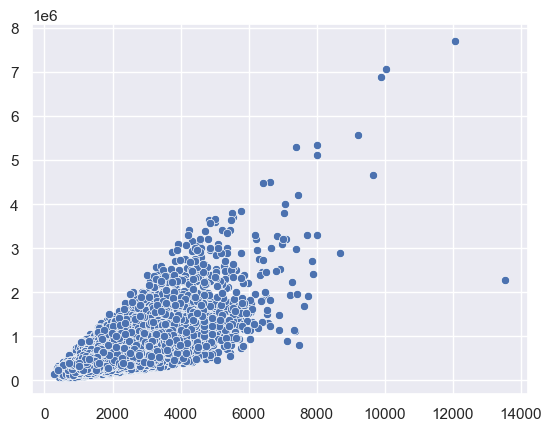

In [20]:
# Visualizacion de los datos en comparativa sqft_living vs price
sns.scatterplot(y=price, x=sqft_living)

In [21]:
#Ajuste de arrays 1-D a 2-D para que la funcion del modelo
price = price.reshape(-1, 1)
sqft_living = price.reshape(-1, 1)

In [32]:
X = sqft_living
y = price
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 50)
regresor = LinearRegression()
regresor.fit(price, sqft_living) # Ajuste de modelo

LinearRegression()

In [35]:
predicting_y = regresor.predict(test_x)
# sqft_living_maxminrange = np.linspace(np.min(data_array), np.max(data_array))
sns.scatterplot(y=price, x=sqft_living)
plt.axline(y= predicting_y)

ValueError: Per-column arrays must each be 1-dimensional